In [60]:
import networkx as nx
import matplotlib
%matplotlib inline

In [61]:
filename = open('text1.txt', 'r')

In [62]:
Z = nx.DiGraph()

In [63]:
for line in filename:
    line = line.strip()
    line = line.split('|')
    Z.add_node(line[0], {'to': line[1], 'fro': line[2]})
print Z.nodes(data=True) 

[('anka', {'to': 'nails', 'fro': 'gardening'}), ('jason', {'to': 'programming', 'fro': 'plumbing'}), ('michael', {'to': 'dog walking', 'fro': 'programming'}), ('joe', {'to': 'painting', 'fro': 'dog walking'}), ('jane', {'to': 'gardening', 'fro': 'painting'}), ('bob', {'to': 'plumbing', 'fro': 'nails'})]


In [64]:
for node_r, attributes in Z.nodes(data=True):
    attr_fro = attributes['fro']
    Z.add_edges_from([(node_r, node) for node, attributes in Z.nodes(data=True)
                      if attr_fro==attributes['to']])

print Z.edges()

[('anka', 'jane'), ('jason', 'bob'), ('michael', 'jason'), ('joe', 'michael'), ('jane', 'joe'), ('bob', 'anka')]


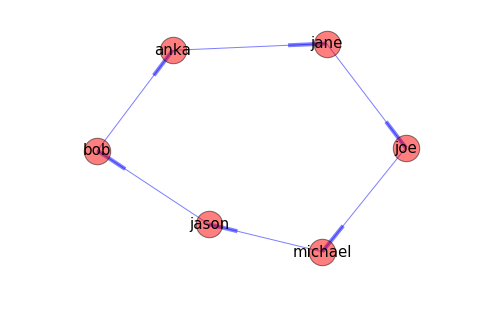

In [84]:
nx.draw(Z, node_color="r",edge_color='blue', with_labels=True,alpha=0.5, 
        node_size=700, width=1, font_size=15, scale=30)

In [90]:
nx.shortest_path(Z, "anka","michael")


['anka', 'jane', 'joe', 'michael']

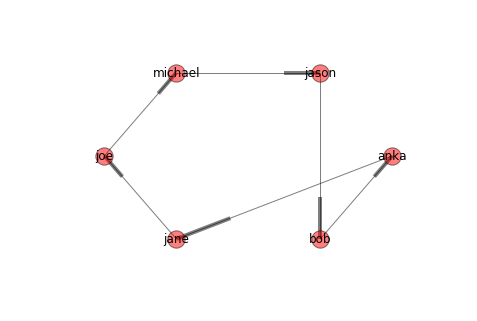

In [75]:
pos = nx.circular_layout(Z, scale=10)
nx.draw(Z, pos, with_labels=True,alpha=0.5)

In [91]:
for m in nx.simple_cycles(Z):
    print m

['anka', 'jane', 'joe', 'michael', 'jason', 'bob']


In [92]:
list(nx.simple_cycles(Z))

[['anka', 'jane', 'joe', 'michael', 'jason', 'bob']]

In [112]:
nx.get_node_attributes(Z,'to')['anka']

'nails'

In [93]:
F = nx.DiGraph()


In [94]:
for node in nx.simple_cycles(Z):
    F.add_nodes_from(node)


In [95]:

g = list(nx.simple_cycles(Z))
b = zip(g[0][::2], g[0][1::2])

In [96]:
F.add_edges_from(b)

In [97]:
print b

[('anka', 'jane'), ('joe', 'michael'), ('jason', 'bob')]


In [98]:
F.edges(), F.nodes()


([('anka', 'jane'), ('jason', 'bob'), ('joe', 'michael')],
 ['anka', 'jason', 'michael', 'joe', 'jane', 'bob'])

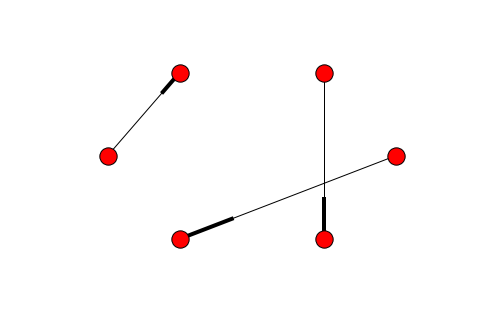

In [99]:
nx.draw_circular(F)